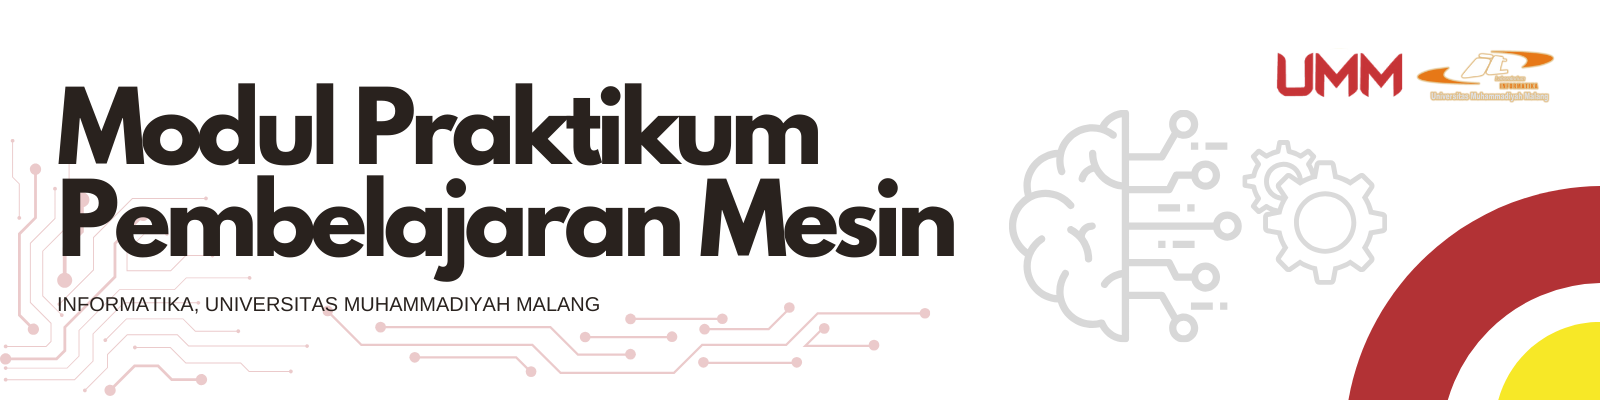

# Klasifikasi Citra

## Persiapan Data

Sebagai contoh, kita akan membuat sebuah klasifikasi citra buah menggunakan model Deep Feed Forward Network dengan CNN sebagai feature extractor nya. Untuk membuat model klasifikasi, kita akan menggunakan pustaka Keras seperti pada modul 1.

### Download dataset

In [ ]:
!pip install gdown
!mkdir "Dataset"

In [ ]:
!gdown "1MV-0MDA5wbYPFnP9rPbgsS_SUlLfPhGo" -O "dataset_citra.zip"
!unzip "dataset_citra.zip" -d "Dataset/"

Downloading...
From: https://drive.google.com/uc?id=1ErZN_Fbt0aYbcaQU4FvngGPu2yRuuYQT
To: /content/dataset_citra.zip
100% 7.15M/7.15M [00:00<00:00, 101MB/s]
Archive:  dataset_citra.zip
   creating: Dataset/peach/
  inflating: Dataset/peach/fresh_peach_1.jpg  
  inflating: Dataset/peach/fresh_peach_10.jpg  
  inflating: Dataset/peach/fresh_peach_100.jpg  
  inflating: Dataset/peach/fresh_peach_101.jpg  
  inflating: Dataset/peach/fresh_peach_102.jpg  
  inflating: Dataset/peach/fresh_peach_103.jpg  
  inflating: Dataset/peach/fresh_peach_104.jpg  
  inflating: Dataset/peach/fresh_peach_105.jpg  
  inflating: Dataset/peach/fresh_peach_106.jpg  
  inflating: Dataset/peach/fresh_peach_107.jpg  
  inflating: Dataset/peach/fresh_peach_108.jpg  
  inflating: Dataset/peach/fresh_peach_109.jpg  
  inflating: Dataset/peach/fresh_peach_11.jpg  
  inflating: Dataset/peach/fresh_peach_110.jpg  
  inflating: Dataset/peach/fresh_peach_111.jpg  
  inflating: Dataset/peach/fresh_peach_112.jpg  
  infla

### Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pathlib


### Constant Variable

Pada bagian ini kita akan mendefinisikan beberapa variabel, yaitu random seed, ukuran citra, batch size, epoch, dan jumlah kelas. Variabel random seed ini ditambahkan agar hasil train sama ketika kita melakukan train ulang. Untuk batch size sebenarnya bebas, semakin besar biasanya semakin bagus. Namun jika batch size ini terlalu besar, akan menggunakan resource yang lebih besar. Jadi sesuaikan dengan kemampuan resource yang ada.

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

IMG_HEIGHT, IMG_WIDTH = 300, 300
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 3
CLASSES = ["peach", "pomegranate", "strawberry"]
DATASET_PATH = "./Dataset/"

### Load the Data

Karena dataset belum dibagi untuk data train dan test, kita lakukan load data lalu kita split dengan ukuran 80:20.

In [ ]:
data_dir = pathlib.Path(DATASET_PATH)

In [ ]:
# Variable dataset yang digunakan sebagai data training. Fungsi tf.keras.utils.image_dataset_from_directory yaitu membuat
# sebuah instance tf.data.Dataset dari sebuah folder dengan nama label yang berisi citra
# Misal susunan folder dataset anda :
# main_directory/
# ...class_a/
# ......a_image_1.jpg
# ......a_image_2.jpg
# ...class_b/
# ......b_image_1.jpg
# ......b_image_2.jpg
# maka akan dibuat sebuah dataset dengan dua label, yaitu class_a dan class_b
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir, # path dataset
  validation_split=0.2, # jumlah validation data dalam tipe data float 0.0-1.0
  subset="training", # nama subset untuk variable ini, tersedia untuk training dan validation
  seed=123, # menetapkan seed agar dataset bisa kita produksi ulang
  image_size=(IMG_HEIGHT, IMG_WIDTH), # tentukan ukuran citra yang ingin digunakan
  batch_size=BATCH_SIZE) # jumlah batch tiap training

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)


Found 811 files belonging to 3 classes.
Using 649 files for training.
Found 811 files belonging to 3 classes.
Using 162 files for validation.


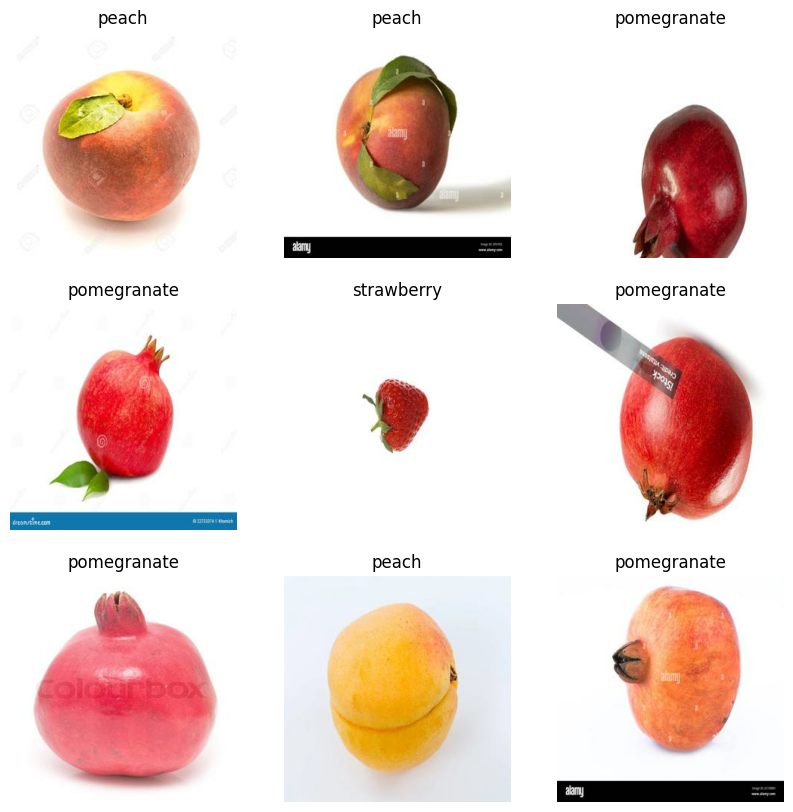

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASSES[labels[i]])
    plt.axis("off")


## Model

Berbeda dengan simulasi pada materi model 1, pada simulasi kali ini kita menggunakan model yang sedikit kompleks. Marena kita menggunakan metode CNN atau Convutional Neural Network, kita perlu menggunakan layer Convutional.

Selain itu, kita juga menggunakan layer MaxPooling guna melakukan subsampling atau downsampling pada data atau fitur yang telah diolah oleh layer Convutional sebelumnya. Layer ini bekerja dengan mengambil nilai maksimum dari sekelompok nilai dalam jendela atau filter kecil yang bergerak melalui gambar atau fitur.

Kemudian terdapat layer Flatten yang digunakan untuk mengubah data dari format matriks multidimensional menjadi vektor satu dimensi. Ini sering digunakan sebagai langkah persiapan sebelum menghubungkan layer-layer berikutnya dalam jaringan saraf tiruan yang terdiri dari layer-layer densily (seperti Fully Connected Layers). Setelah data di-flatten, kita dapat menghubungkannya dengan layer-layer fully connected untuk pemrosesan lanjutan seperti klasifikasi.

Pada output kita menggunakan 3 neuron dan aktivasi softmax. Karena pada kasus kali ini kita melakukan klasifikasi multikelas (Lebih dari 2 kelas).

In [ ]:
model = Sequential([
    Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Setelah model telah dibuat, kita melakukan compiling model dengan menentukan parameter optimizer, loss, dan metrics. Untuk loss pastikan memakai sparse categorical crossentropy agar bisa digunakan untuk melakukan prediksi. Kita memakai jenis loss ini karena output dari model ada 3, menyesuaikan dengan jumlah kelas pada dataset. Jika hanya ada satu output pada model, bisa dilihat pada modul 1.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 156800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      80,282,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,376,899 (306.61 MB)

 Trainable params: 80,376,899 (306.61 MB)

 Non-trainable params: 0 (0.00 B)

Semua sudah siap dan saatnya dilakukan pelatihan model!

In [ ]:
history = model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_ds)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 632ms/step - accuracy: 0.4051 - loss: 6.1961 - val_accuracy: 0.6790 - val_loss: 0.6530
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.7071 - loss: 0.6810 - val_accuracy: 0.8889 - val_loss: 0.4129
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8214 - loss: 0.4392 - val_accuracy: 0.8951 - val_loss: 0.3328
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8799 - loss: 0.3139 - val_accuracy: 0.9259 - val_loss: 0.3083
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9358 - loss: 0.2310 - val_accuracy: 0.7037 - val_loss: 0.7945
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8861 - loss: 0.2992 - val_accuracy: 0.8951 - val_loss: 0.2580
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9350 - loss: 0.1715 - val_accuracy: 0.8395 - val_loss: 0.3799
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9557 - loss: 0.1064 - val_accuracy: 0.821

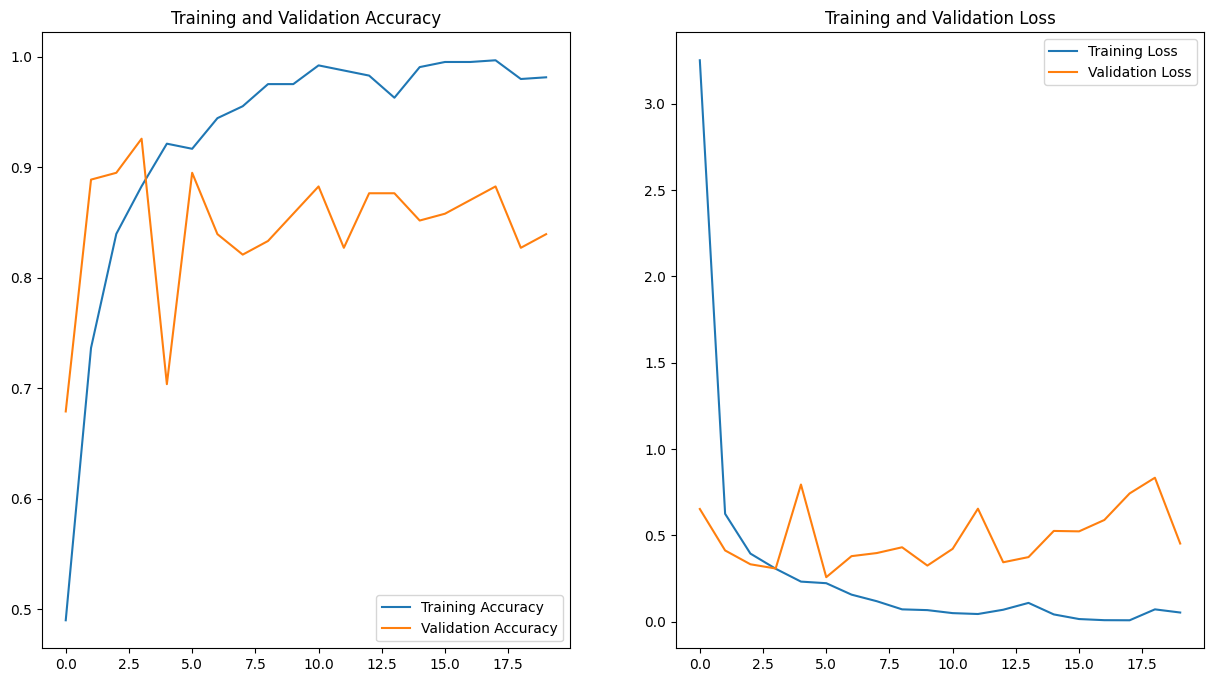

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(val_ds)
print('Test accuracy :', accuracy)
print('Test loss :', loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8018 - loss: 0.6001
Test accuracy : 0.8395061492919922
Test loss : 0.4528864622116089


In [ ]:
y_true = []
y_pred = []

for images, labels in val_ds:
    batch_predictions = model.predict(images)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(batch_pred_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=CLASSES))

              precision    recall  f1-score   support

       peach       0.88      0.86      0.87        50
 pomegranate       0.86      0.80      0.83        74
  strawberry       0.77      0.89      0.83        38

    accuracy                           0.84       162
   macro avg       0.84      0.85      0.84       162
weighted avg       0.84      0.84      0.84       162



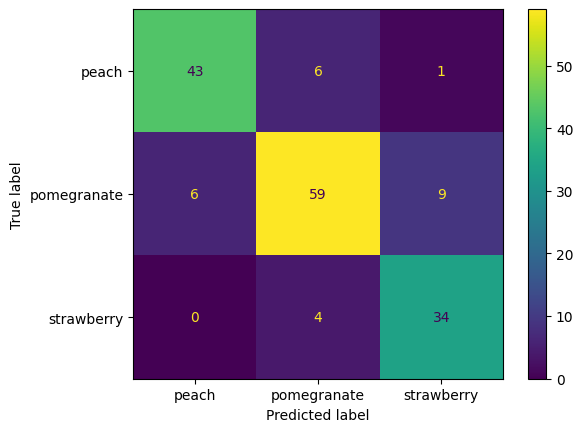

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
disp.plot()
plt.show()